In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [6]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [7]:
df1 = pd.get_dummies(data=df, columns=['BP','Cholesterol','Sex'])
df1.head()

,Age,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,23,25.355,DrugY,1,0,0,1,0,1,0
1,47,13.093,drugC,0,1,0,1,0,0,1
2,47,10.114,drugC,0,1,0,1,0,0,1
3,28,7.798,drugX,0,0,1,1,0,1,0
4,61,18.043,DrugY,0,1,0,1,0,1,0


In [8]:
df1.describe()

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.385000,0.320000,0.295000,0.515000,0.485000,0.480000,0.520000
std,16.544315,7.223956,0.487816,0.467647,0.457187,0.501029,0.501029,0.500854,0.500854
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,13.936500,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,58.000000,19.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,74.000000,38.247000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1[['Age','Na_to_K']]=sc.fit_transform(df1[['Age','Na_to_K']])

In [10]:
df1.head()

,Age,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,0.135593,0.596848,DrugY,1,0,0,1,0,1,0
1,0.542373,0.213397,drugC,0,1,0,1,0,0,1
2,0.542373,0.120239,drugC,0,1,0,1,0,0,1
3,0.220339,0.047814,drugX,0,0,1,1,0,1,0
4,0.779661,0.368191,DrugY,0,1,0,1,0,1,0


In [11]:
x = df1.drop(['Drug'],axis=1)

In [12]:
y = df1['Drug']

In [13]:
x.head()

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,0.135593,0.596848,1,0,0,1,0,1,0
1,0.542373,0.213397,0,1,0,1,0,0,1
2,0.542373,0.120239,0,1,0,1,0,0,1
3,0.220339,0.047814,0,0,1,1,0,1,0
4,0.779661,0.368191,0,1,0,1,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.25)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.88

In [31]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc) 

Text(0, 0.5, 'accuracy')

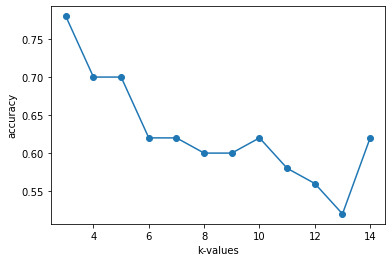

In [34]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
kn= KNN(n_neighbors= 3,metric='minkowski')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)

In [41]:
acc=accuracy_score(y_test,y_pred)
acc

0.78

In [27]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [28]:
acc=accuracy_score(y_test,y_pred)
acc

0.7

Submitted by:
    
    Nimisha.A
    Albert M Ruby
    Kavya M
    Swathi
    Mohammed 